In [84]:
import pandas as pd

df = pd.read_csv("data/loan.csv")
df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [85]:
df.shape


(4269, 13)

In [86]:
df.dtypes


loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [87]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [88]:
df[' loan_status'].value_counts()
df[' loan_status'].value_counts(normalize=True)


 loan_status
Approved    0.62216
Rejected    0.37784
Name: proportion, dtype: float64

In [89]:
df = df.rename(columns={' loan_status': 'Loan_Status'})


In [90]:
df['Loan_Status'].dtype


dtype('O')

In [91]:
df['Loan_Status'] = df['Loan_Status'].astype(str).str.strip().str.lower()


In [92]:
df['Loan_Status'].unique()


array(['approved', 'rejected'], dtype=object)

In [93]:
df['Loan_Status'] = df['Loan_Status'].map({
    'approved': 1,
    'rejected': 0
})



In [94]:
df['Loan_Status'].unique()
df['Loan_Status'].value_counts()

Loan_Status
1    2656
0    1613
Name: count, dtype: int64

In [95]:

X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']


In [96]:
X = pd.get_dummies(X, drop_first=True)


In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [99]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [100]:
import numpy as np

y_prob = model.predict_proba(X_test)
y_pred = model.predict(X_test)

confidence = np.max(y_prob, axis=1)


In [101]:
wrong = y_pred != y_test.values

confidence_wrong = confidence[wrong]
confidence_correct = confidence[~wrong]

print("Average confidence (WRONG):", confidence_wrong.mean())
print("Average confidence (CORRECT):", confidence_correct.mean())


Average confidence (WRONG): 0.6814078280471436
Average confidence (CORRECT): 0.838178860724414


In [102]:
threshold = 0.8


In [103]:
#Confidence-based rejection

accepted = confidence >= threshold
rejected = confidence < threshold

print("Accepted predictions:", accepted.sum())
print("Rejected predictions:", rejected.sum())


Accepted predictions: 497
Rejected predictions: 357


In [104]:
from sklearn.metrics import accuracy_score

accuracy_accepted = accuracy_score(
    y_test[accepted],
    y_pred[accepted]
)

print("Accuracy on accepted predictions:", accuracy_accepted)


Accuracy on accepted predictions: 0.9295774647887324


In [105]:
coverage = accepted.mean()

print("Coverage (fraction predicted):", coverage)
print("Accuracy (on accepted):", accuracy_accepted)


Coverage (fraction predicted): 0.5819672131147541
Accuracy (on accepted): 0.9295774647887324


**Introducing a confidence threshold allows the system to abstain from low-confidence decisions, significantly improving reliability at the cost of reduced coverage. This mirrors real-world financial risk management systems.**



In [107]:
thresholds = [0.6, 0.7, 0.8, 0.9]

accuracies = []
coverages = []


In [108]:
from sklearn.metrics import accuracy_score
import numpy as np

for t in thresholds:
    accepted = confidence >= t
    
    # coverage = fraction of predictions we accept
    coverage = accepted.mean()
    
    # accuracy only on accepted predictions
    acc = accuracy_score(
        y_test[accepted],
        y_pred[accepted]
    )
    
    coverages.append(coverage)
    accuracies.append(acc)
    
    print(f"Threshold={t} | Coverage={coverage:.2f} | Accuracy={acc:.2f}")


Threshold=0.6 | Coverage=0.87 | Accuracy=0.86
Threshold=0.7 | Coverage=0.72 | Accuracy=0.91
Threshold=0.8 | Coverage=0.58 | Accuracy=0.93
Threshold=0.9 | Coverage=0.38 | Accuracy=0.96


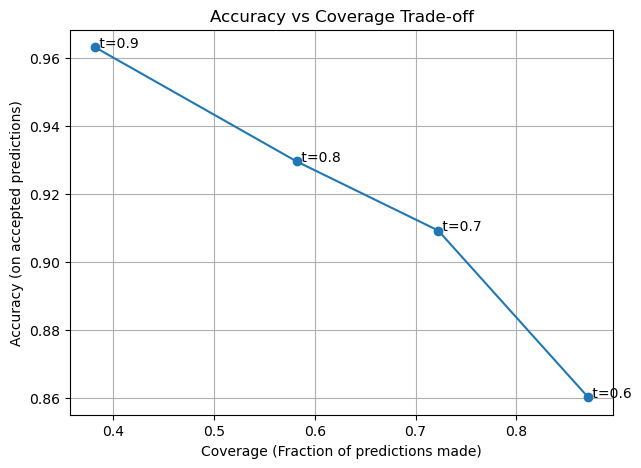

In [109]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.plot(coverages, accuracies, marker='o')

for i, t in enumerate(thresholds):
    plt.text(coverages[i], accuracies[i], f" t={t}")

plt.xlabel("Coverage (Fraction of predictions made)")
plt.ylabel("Accuracy (on accepted predictions)")
plt.title("Accuracy vs Coverage Trade-off")
plt.grid(True)
plt.show()


**Accuracy–Coverage Trade-off
Increasing the confidence threshold improves prediction reliability at the cost of reduced coverage. This enables risk-aware deployment by selectively abstaining on uncertain cases.**

# Business Rule & Deployment Logic
Business Rule for Rejected Predictions

Loan applications with prediction confidence below the defined threshold are not automatically approved or rejected. Instead, these cases are routed to human loan officers for manual review.

This hybrid human-AI workflow ensures high-risk or ambiguous cases receive expert judgment, while the AI system handles confident decisions at scale. This mirrors real-world financial risk management practices.

